# Hyperparams Tuning Strategies Experimentation

Rahul Chembakasseril  
2024-01-11

<figure>
<a
href="https://colab.research.google.com/github/nipunbatra/ml-teaching/blob/master/notebooks/hyperparams-experiments.ipynb"><img
src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
<figcaption>Open In Colab</figcaption>
</figure>

In [3]:
import numpy as np 
np.random.seed(20)
import matplotlib.pyplot as plt
import pandas as pd
# Retina display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from latexify import latexify, format_axes

MakeMoons Dataset

1.1 Fixed Train-Test (70:30) split ; No Tuning

In [19]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

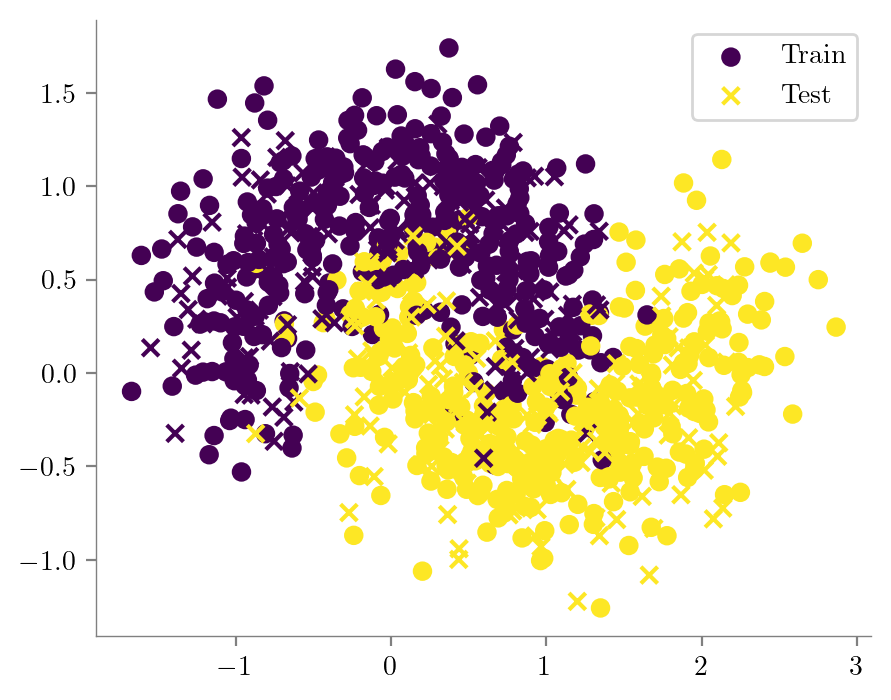

In [20]:
latexify(fig_width=5, fig_height=4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train') 
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
format_axes(plt.gca())
plt.legend()

In [21]:
len(X_train), len(X_test)

(700, 300)

In [22]:
#hyperparameters take their default values
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
test_accuracy = dt_classifier.score(X_test, y_test)
print("Test set accuracy: {:.4f}".format(test_accuracy))

Test set accuracy: 0.8933

1.2 Multiple Random Train-Test splits

In [29]:
# Initialize an empty list to store the accuracy metrics
accuracy_metrics = []
all_test_sets = []
all_predictions = []

X_tests = []

# Perform 10 random train-test splits and repeat the fit
for _ in range(10):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(100))
    X_tests.append(X_test)
    # Create and fit the decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)

    current_predictions = dt_classifier.predict(X_test)
    all_predictions.append(current_predictions)
    current_accuracy = np.mean(current_predictions == y_test)
    all_test_sets.append(y_test)
    
    # Calculate the accuracy on the test set
    test_accuracy = dt_classifier.score(X_test, y_test)
    
    # Append the accuracy to the list
    accuracy_metrics.append(test_accuracy)

# Calculate the mean and standard deviation of the accuracy metrics
mean_accuracy = np.mean(accuracy_metrics)
std_accuracy = np.std(accuracy_metrics)

# Print the mean and standard deviation
print("Mean accuracy: {:.4f}".format(mean_accuracy))
print("Standard deviation: {:.4f}".format(std_accuracy))

# Print minimum and maximum accuracies
print("Minimum accuracy: {:.4f}".format(min(accuracy_metrics)))
print("Maximum accuracy: {:.4f}".format(max(accuracy_metrics)))


Mean accuracy: 0.8800
Standard deviation: 0.0211
Minimum accuracy: 0.8400
Maximum accuracy: 0.9133

In [30]:
# Find number of unique element in X_tests
found_unique_test_samples = len(np.unique(np.concatenate(X_tests), axis=0))
print(f"Number of unique test samples: {found_unique_test_samples}")
print(f"Ideally we wanted {len(X)} unique test samples")

Number of unique test samples: 964
Ideally we wanted 1000 unique test samples

1.3 K-Fold Cross Validation

In [37]:
import numpy as np
# Define the number of folds (k)
k = 5

# Initialize lists to store predictions and accuracies
predictions = {}
accuracies = []

# Calculate the size of each fold
fold_size = len(X) // k

# Perform k-fold cross-validation
for i in range(k):
    # Split the data into training and test sets
    test_start = i * fold_size
    test_end = (i + 1) * fold_size
    test_set = X[test_start:test_end]
    test_labels = y[test_start:test_end]
    
    training_set = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    print(len(test_set))
    training_labels = np.concatenate((y[:test_start], y[test_end:]), axis=0)
    
    # Train the model
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(training_set, training_labels)
    
    # Make predictions on the validation set
    fold_predictions = dt_classifier.predict(test_set)
    
    # Calculate the accuracy of the fold
    fold_accuracy = np.mean(fold_predictions == test_labels)
    
    # Store the predictions and accuracy of the fold
    predictions[i] = fold_predictions
    accuracies.append(fold_accuracy)

# Print the predictions and accuracies of each fold
for i in range(k):
    print("Fold {}: Accuracy: {:.4f}".format(i+1, accuracies[i]))


200
200
200
200
200
Fold 1: Accuracy: 0.8700
Fold 2: Accuracy: 0.8850
Fold 3: Accuracy: 0.9300
Fold 4: Accuracy: 0.8650
Fold 5: Accuracy: 0.8850

In [38]:
from cgi import test
from sklearn.model_selection import KFold

# Define the number of folds (k)
k = 5

# Initialize lists to store predictions and accuracies
predictions = {}
accuracies = []

# Create a KFold instance
kf = KFold(n_splits=k, shuffle=False)

# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and test sets
    training_set, test_set = X[train_index], X[test_index]
    print(len(test_set))
    training_labels, test_labels = y[train_index], y[test_index]
    
    # Train the model
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(training_set, training_labels)
    
    # Make predictions on the validation set
    fold_predictions = dt_classifier.predict(test_set)
    
    # Calculate the accuracy of the fold
    fold_accuracy = np.mean(fold_predictions == test_labels)
    
    # Store the predictions and accuracy of the fold
    predictions[i] = fold_predictions
    accuracies.append(fold_accuracy)

    # Print the predictions and accuracy of each fold
    print("Fold {}: Accuracy: {:.4f}".format(i+1, fold_accuracy))

200
Fold 1: Accuracy: 0.8700
200
Fold 2: Accuracy: 0.8850
200
Fold 3: Accuracy: 0.9300
200
Fold 4: Accuracy: 0.8650
200
Fold 5: Accuracy: 0.8850

##### Micro and Macro Averaging

In [54]:
from sklearn.metrics import accuracy_score

# Method 1 for computing accuracy
accuracy_1 = accuracy_score(y, np.concatenate(list(predictions.values())))

# Calculate macro-averaged accuracy
accuracy_2 = np.mean(accuracies)

# Print the micro and macro averaged accuracy
print("Method 1 accuracy: {:.4f}".format(accuracy_1))
print("Method2 accuracy: {:.4f}".format(accuracy_2))


Method 1 accuracy: 0.8870
Method2 accuracy: 0.8870

2.1 Fixed Train-Test Split (hyperparameters tuned on Validation set)

2.1.1 Validation Set as fixed Subset of Training Set

In [42]:
len(X)

1000

In [43]:
# Step 1: Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.285, random_state=42)

In [41]:
print("Number of training examples: {}".format(len(X_train)))
print("Number of validation examples: {}".format(len(X_val)))
print("Number of testing examples: {}".format(len(X_test)))

Number of training examples: 500
Number of validation examples: 200
Number of testing examples: 300

In [45]:
hyperparameters = {}
hyperparameters['max_depth'] = [1,2,3,4,5,6,7,8,9,10]
hyperparameters['min_samples_split'] = [2,3,4,5,6,7,8]
hyperparameters['criteria_values'] = ['gini', 'entropy']

best_accuracy = 0
best_hyperparameters = {}

out = {}
count = 0
for max_depth in hyperparameters['max_depth']:
    for min_samples_split in hyperparameters['min_samples_split']:
        for criterion in hyperparameters['criteria_values']:
            # Create and fit the decision tree classifier with the current hyperparameters
            dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion, random_state=42)
            dt_classifier.fit(X_train, y_train)
            
            # Evaluate the performance on the validation set
            val_accuracy = dt_classifier.score(X_val, y_val)
            out[count] = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'criterion': criterion, 'val_accuracy': val_accuracy}
            count += 1


In [46]:
hparam_df = pd.DataFrame(out).T
hparam_df

140 rows × 4 columns

In [47]:
hparam_df.sort_values(by='val_accuracy', ascending=False).head(10)

In [48]:
# Ensure dtype of val_accuracy is float
hparam_df['val_accuracy'] = hparam_df['val_accuracy'].astype(float)


In [49]:
best_hyperparameters_row = hparam_df.iloc[hparam_df['val_accuracy'].idxmax()]
best_accuracy = best_hyperparameters_row['val_accuracy']
best_hyperparameters = best_hyperparameters_row[['max_depth', 'min_samples_split', 'criterion']].to_dict()

In [50]:
best_hyperparameters

{'max_depth': 6, 'min_samples_split': 5, 'criterion': 'gini'}

In [51]:
# Evaluate the performance of the selected hyperparameter combination on the test set
dt_classifier = DecisionTreeClassifier(max_depth=best_hyperparameters['max_depth'], 
                                       min_samples_split=best_hyperparameters['min_samples_split'], 
                                       criterion=best_hyperparameters['criterion'], 
                                       random_state=42)
dt_classifier.fit(X_train_val, y_train_val)
test_accuracy = dt_classifier.score(X_test, y_test)

print("Best Hyperparameters:", best_hyperparameters)
print("Validation Set accuracy: {:.4f}".format(best_accuracy))
print("Test Set accuracy: {:.4f}".format(test_accuracy))

Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 5, 'criterion': 'gini'}
Validation Set accuracy: 0.9250
Test Set accuracy: 0.9067

Avoiding nested loops by using itertools.product

``` python
for max_depth in hyperparameters['max_depth']:
    for min_samples_split in hyperparameters['min_samples_split']:
        for criterion in hyperparameters['criteria_values']:
            # Create and fit the decision tree classifier with the current hyperparameters
            dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion, random_state=42)
            dt_classifier.fit(X_train, y_train)
            
            # Evaluate the performance on the validation set
            val_accuracy = dt_classifier.score(X_val, y_val)
            out[count] = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'criterion': criterion, 'val_accuracy': val_accuracy}
            count += 1
```

In [52]:
from itertools import product

for max_depth, min_samples_split, criterion in product(hyperparameters['max_depth'], hyperparameters['min_samples_split'], hyperparameters['criteria_values']):
    # Define the Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        criterion=criterion,
        random_state=42
    )
    dt_classifier.fit(X_train, y_train)

2.1.2 Multiple random subsets of Training Set used as Validation Set

In [35]:
# Initialize a list to store the optimal hyperparameters for each validation set
optimal_hyperparameters = {}
test_accuracies = []

# Set the number of subsets and iterations
num_subsets = 5

# Make a pandas dataframe with columns as the hyperparameters, subset number, and validation accuracy
hyperparameters_df = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'criterion', 'subset', 'validation accuracy'])

# Iterate over the subsets
for i in range(num_subsets):
    # Split the data into training and validation sets
    X_train_subset, X_val_subset, y_train_subset, y_val_subset = train_test_split(X_train_val, y_train_val, test_size=0.285, random_state=i)
    
    # Initialize variables to store the best hyperparameters and accuracy for the current subset
    best_accuracy = 0
    best_hyperparameters = {}
    
    # Iterate over the hyperparameter values

    for max_depth in hyperparameters['max_depth']:
        for min_samples_split in hyperparameters['min_samples_split']:
            for criterion in hyperparameters['criteria_values']:
                # Initialize and train the model with the current hyperparameters
                dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion, random_state=42)
                dt_classifier.fit(X_train_subset, y_train_subset)
                
                # Evaluate the model on the validation set
                val_accuracy = dt_classifier.score(X_val_subset, y_val_subset)
                hyperparameters_df.loc[len(hyperparameters_df)] = [max_depth, min_samples_split, criterion, i+1, val_accuracy]
                
                # Update the best accuracy and hyperparameters
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_hyperparameters = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'criterion': criterion
                    }
    
    optimal_hyperparameters[i] = best_hyperparameters

    # Evaluate the model with the best hyperparameters on the test set
    dt_classifier = DecisionTreeClassifier(max_depth=best_hyperparameters['max_depth'], min_samples_split=best_hyperparameters['min_samples_split'], criterion=best_hyperparameters['criterion'], random_state=42)
    dt_classifier.fit(X_train_val, y_train_val)
    test_accuracy = dt_classifier.score(X_test, y_test)
    test_accuracies.append(test_accuracy)



print("Optimal hyperparameters for {} inner folds/validation sets".format(num_subsets))
print()
# Print the optimal hyperparameters for each validation set
for i in range(num_subsets):
    print("Optimal hyperparameters for validation set {}: {}".format(i+1, optimal_hyperparameters[i]))
    print("Test Accuracy for validation set {}: {:.4f}".format(i+1, test_accuracies[i]))


Optimal hyperparameters for 5 inner folds/validation sets

Optimal hyperparameters for validation set 1: {'max_depth': 7, 'min_samples_split': 6, 'criterion': 'entropy'}
Test Accuracy for validation set 1: 0.9000
Optimal hyperparameters for validation set 2: {'max_depth': 5, 'min_samples_split': 7, 'criterion': 'gini'}
Test Accuracy for validation set 2: 0.9033
Optimal hyperparameters for validation set 3: {'max_depth': 6, 'min_samples_split': 2, 'criterion': 'entropy'}
Test Accuracy for validation set 3: 0.9233
Optimal hyperparameters for validation set 4: {'max_depth': 7, 'min_samples_split': 4, 'criterion': 'entropy'}
Test Accuracy for validation set 4: 0.9000
Optimal hyperparameters for validation set 5: {'max_depth': 6, 'min_samples_split': 2, 'criterion': 'entropy'}
Test Accuracy for validation set 5: 0.9233

In [36]:
hyperparameters_df

700 rows × 5 columns

In [37]:
grouped_df = hyperparameters_df.groupby(['max_depth', 'min_samples_split', 'criterion']).mean()['validation accuracy']
grouped_df

max_depth  min_samples_split  criterion
1          2                  entropy      0.769
                              gini         0.771
           3                  entropy      0.769
                              gini         0.771
           4                  entropy      0.769
                                           ...  
10         6                  gini         0.889
           7                  entropy      0.902
                              gini         0.894
           8                  entropy      0.904
                              gini         0.893
Name: validation accuracy, Length: 140, dtype: float64

In [38]:
grouped_df.sort_values(ascending=False).head(10)

max_depth  min_samples_split  criterion
6          7                  entropy      0.914
           8                  entropy      0.914
7          7                  entropy      0.912
6          6                  entropy      0.912
7          8                  entropy      0.912
           6                  entropy      0.910
6          4                  entropy      0.910
           5                  entropy      0.910
7          4                  entropy      0.909
           5                  entropy      0.909
Name: validation accuracy, dtype: float64

In [39]:
optimal_hyperparams = grouped_df.idxmax()
optimal_hyperparams

(6, 7, 'entropy')

In [40]:
df_classifier = DecisionTreeClassifier(max_depth=optimal_hyperparams[0], min_samples_split=optimal_hyperparams[1], criterion=optimal_hyperparams[2], random_state=42)
df_classifier.fit(X_train_val, y_train_val)
test_accuracy = df_classifier.score(X_test, y_test)
print("Test accuracy: {:.4f}".format(test_accuracy))

Test accuracy: 0.9233

2.2 Nested Cross-Validation

In [70]:
hyperparameters['max_depth'] = [1,2,3,4,5,6,7,8,9,10]
hyperparameters['min_samples_split'] = [2,3,4,5,6,7,8]
hyperparameters['criteria_values'] = ['gini', 'entropy']

In [55]:
num_outer_folds = 5
num_inner_folds = 5

kf_outer = KFold(n_splits=num_outer_folds, shuffle=False)
kf_inner = KFold(n_splits=num_inner_folds, shuffle=False)

# Initialize lists to store the accuracies for the outer and inner loops
outer_loop_accuracies = []
inner_loop_accuracies = []

results= {}
outer_count = 0
overall_count = 0
# Iterate over the outer folds
for outer_train_index, outer_test_index in kf_outer.split(X):
    # Split the data into outer training and test sets
    X_outer_train, X_outer_test = X[outer_train_index], X[outer_test_index]
    y_outer_train, y_outer_test = y[outer_train_index], y[outer_test_index]
    
    
    inner_count = 0
    
    for innner_train_index, inner_test_index in kf_inner.split(X_outer_train):
        print("*****"*20)
        print("Outer Fold {}, Inner Fold {}".format(outer_count+1, inner_count+1))
        # Split the data into inner training and test sets
        X_inner_train, X_inner_test = X_outer_train[innner_train_index], X_outer_train[inner_test_index]
        y_inner_train, y_inner_test = y_outer_train[innner_train_index], y_outer_train[inner_test_index]
        
        for max_depth, min_samples_split, criterion in product(hyperparameters['max_depth'],
                                                               hyperparameters['min_samples_split'],
                                                               hyperparameters['criteria_values']):
            
            #print(max_depth, min_samples_split, criterion)
            # Initialize and train the model with the current hyperparameters
            dt_classifier = DecisionTreeClassifier(max_depth=max_depth, 
                                                   min_samples_split=min_samples_split, 
                                                   criterion=criterion, random_state=42)
            dt_classifier.fit(X_inner_train, y_inner_train)
            
            # Evaluate the model on the inner test set
            val_accuracy = dt_classifier.score(X_inner_test, y_inner_test)
            
            results[overall_count] = {'outer_fold': outer_count, 
                                      'inner_fold': inner_count, 
                                      'max_depth': max_depth, 
                                      'min_samples_split': min_samples_split, 
                                      'criterion': criterion, 
                                      'val_accuracy': val_accuracy}
            overall_count += 1

        inner_count += 1
    outer_count += 1
    
            
            

****************************************************************************************************
Outer Fold 1, Inner Fold 1
****************************************************************************************************
Outer Fold 1, Inner Fold 2
****************************************************************************************************
Outer Fold 1, Inner Fold 3
****************************************************************************************************
Outer Fold 1, Inner Fold 4
****************************************************************************************************
Outer Fold 1, Inner Fold 5
****************************************************************************************************
Outer Fold 2, Inner Fold 1
****************************************************************************************************
Outer Fold 2, Inner Fold 2
****************************************************************************************************
Out

In [56]:
overall_results = pd.DataFrame(results).T

In [57]:
overall_results

3500 rows × 6 columns

Find the best hyperparameters for each outer fold

In [58]:
outer_fold = 0
outer_fold_df = overall_results.query('outer_fold == @outer_fold')
outer_fold_df

700 rows × 6 columns

Aggregate the validation accuracies for each hyperparameter combination
across all inner folds

In [59]:
outer_fold_df.groupby(['max_depth', 'min_samples_split', 'criterion']).mean()['val_accuracy'].sort_values(ascending=False).head(10)

max_depth  min_samples_split  criterion
6          7                  gini          0.9175
           8                  gini          0.9175
           6                  gini          0.9175
           4                  gini         0.91625
           3                  gini         0.91625
           2                  gini         0.91625
           5                  gini         0.91625
7          6                  gini         0.91625
           7                  gini         0.91625
           8                  gini           0.915
Name: val_accuracy, dtype: object